In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


local
stop final relax at some point
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info    : Function properties fo

In [2]:
%load_ext pyinstrument

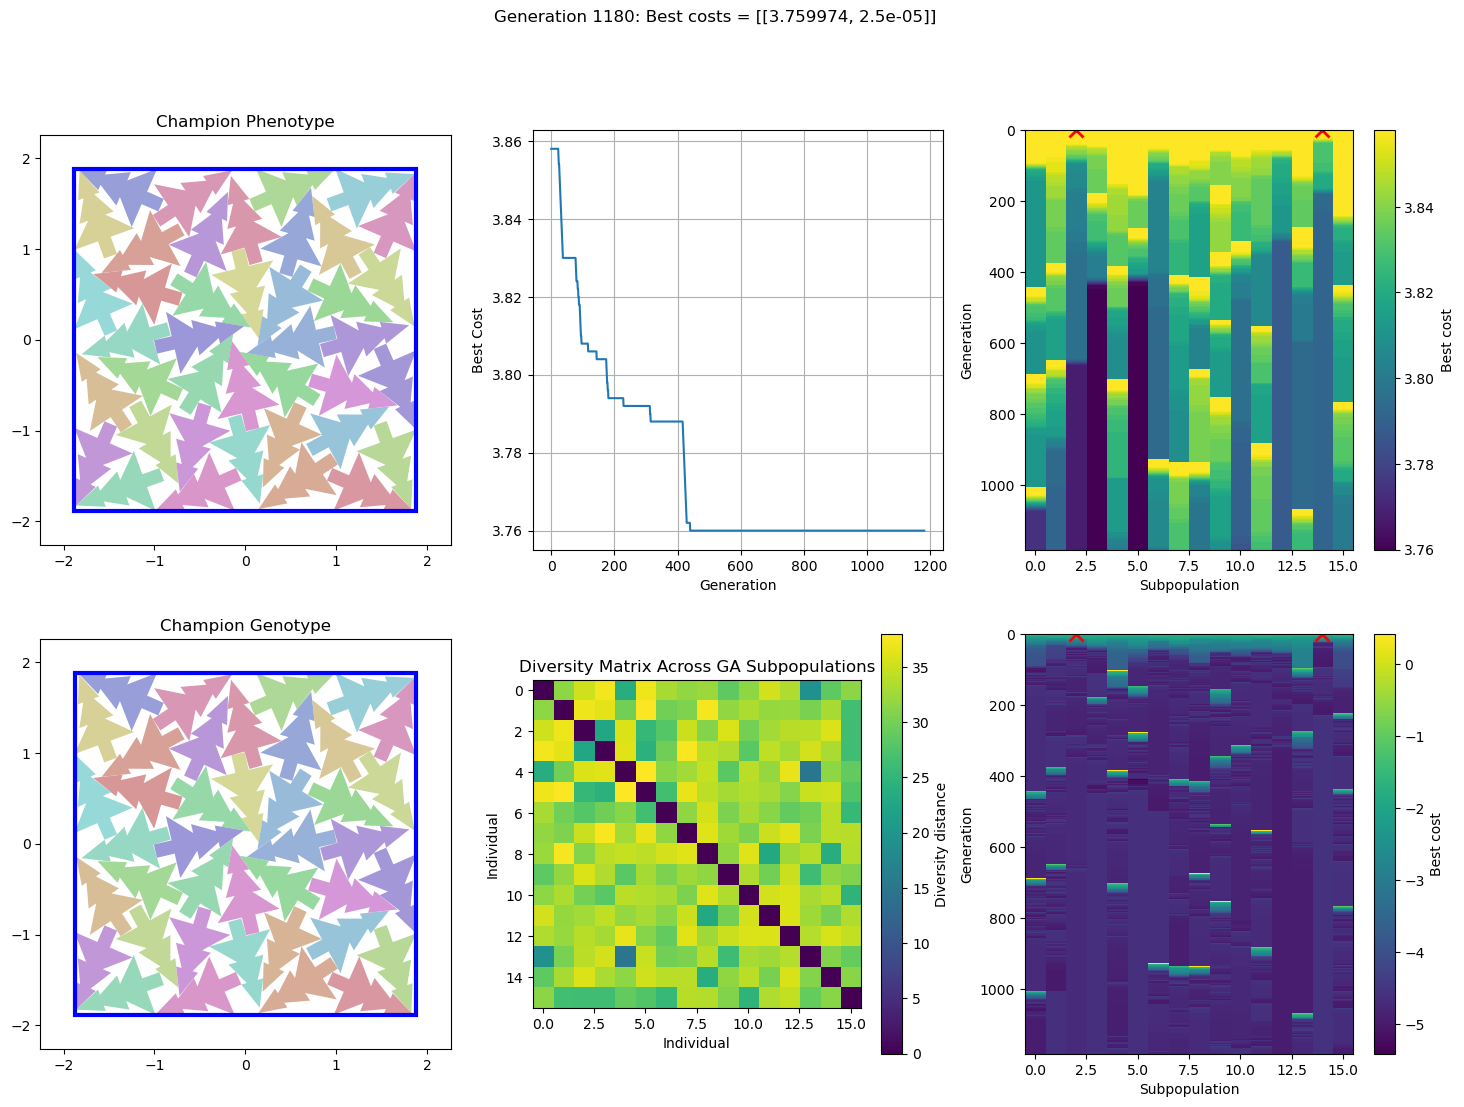

KeyboardInterrupt: 

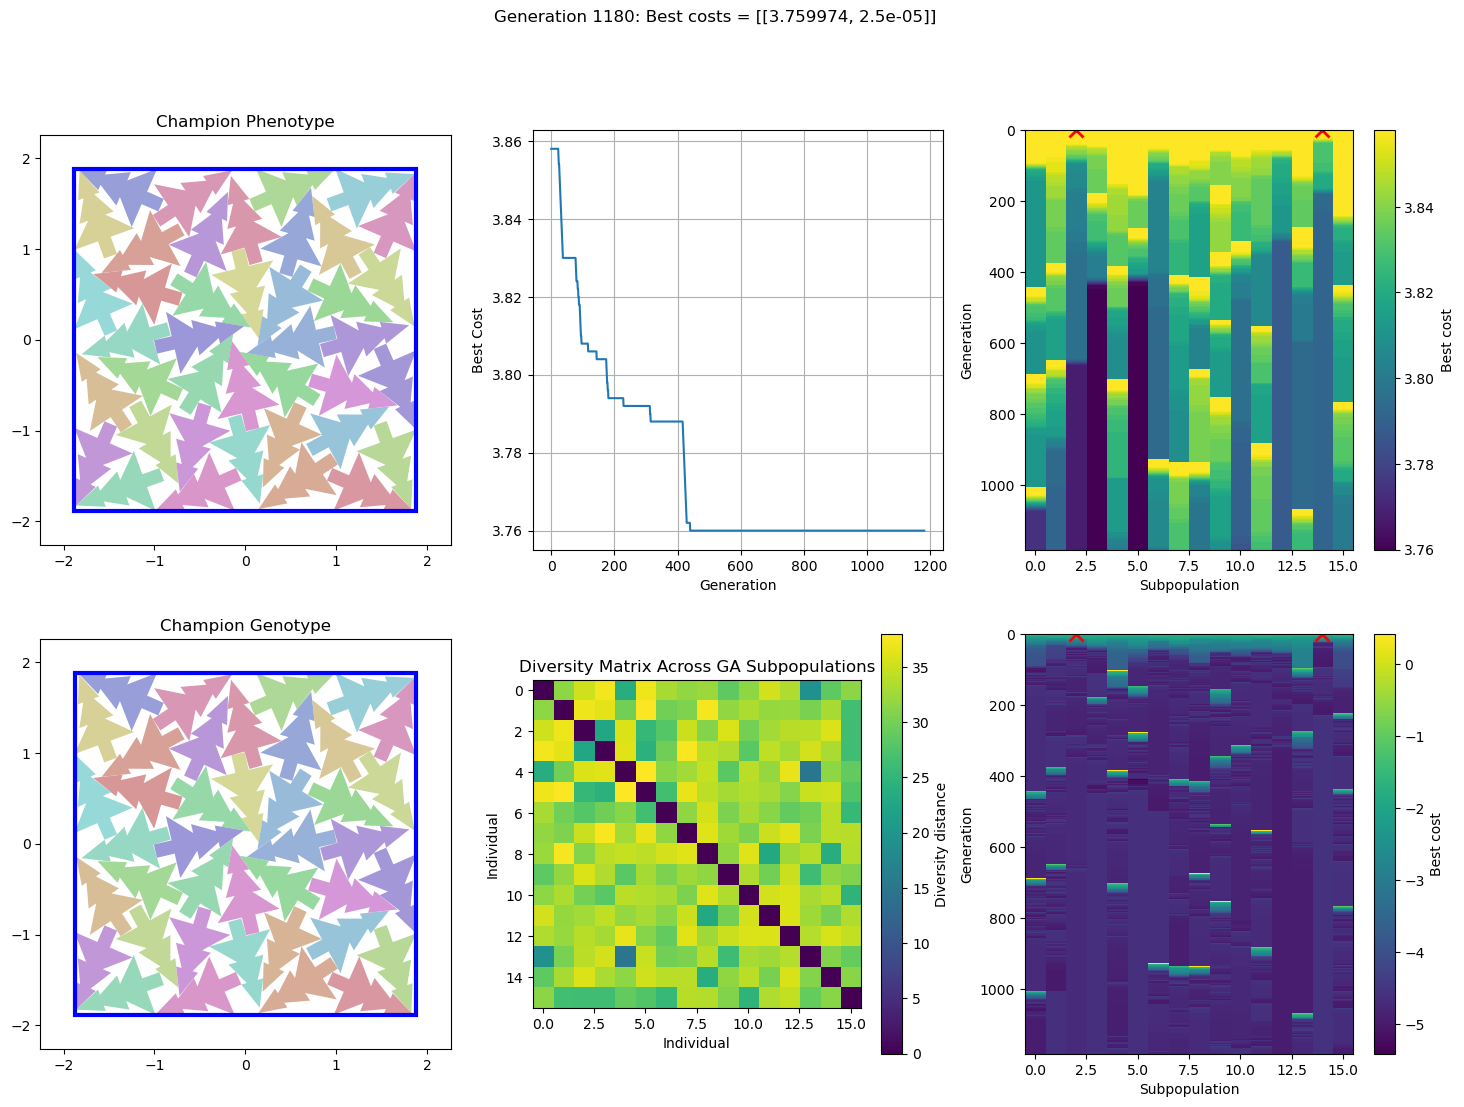

In [ ]:
# %%pyinstrument
# kgs.profiling=True
# %matplotlib widget
import pack_ga3 as pack_ga2
import pack_runner
importlib.reload(pack_ga2)
fastMode = False
kgs.debugging_mode = 2

tmp = pack_ga2.GA()

runner = pack_ga2.Orchestrator(n_generations=6000 if not fastMode else 50)
runner.ga = pack_ga2.GAMultiRing(N=16 if not fastMode else 4)
#runner.ga.mate_distance=16 if not fastMode else 2

ga_base = pack_ga2.GASinglePopulationOld(N_trees_to_do=40)
#ga_base.population_size = 250
#ga_base.prob_mate_own = 0.25
value = 0.125
ga_base.population_size = int(ga_base.population_size * value)
ga_base.selection_size = [int( (s-1) * value)+1 for s in ga_base.selection_size]
ga_base.do_legalize = False
ga_base.reset_check_generations = 50 if not fastMode else 3
ga_base.reset_check_threshold = 0.5 if not fastMode else 0.9
ga_base.freeze_duration = 100 if not fastMode else 3
#ga_base.move.moves[-1][2] *= 2
ga_base.prob_mate_own = 0.9
ga_base.reduce_h_threshold = 1e-3

runner.ga.ga_base = ga_base
runner.ga.do_legalize = not fastMode
runner.ga.allow_reset_ratio = 0.5 if not fastMode else 0.
runner.ga.best_costs_per_generation_ax = ((0,False,(0,1)),)#( (0,False,(0,0)) ,(1,True,(0,1)))
runner.ga.plot_subpopulation_costs_per_generation_ax = ( (0,False,(0,2)) ,(1,True,(1,2)))
runner.ga.champion_genotype_ax = (1,0)
runner.ga.champion_phenotype_ax = (0,0)
runner.ga.plot_diversity_ax = (1,1)
runner.diagnostic_plot = True
runner.seed = 0

runner.run()

In [9]:
runner.ga.do_legalize = True
runner.ga.finalize()

Before optimization:  0.14139874279499054 2.4679538910277188e-05 3.7599742


/mnt/d/packing/code/analysis/../core/pack_dynamics.py:61: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:93: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.14073625206947327 0.0003318614326417446 3.7470574
After optimization:  0.14114175736904144 8.570988575229421e-05 3.7557428
After optimization:  0.14141982793807983 2.16690623346949e-05 3.7602947
After optimization:  0.14157633483409882 5.632134616462281e-06 3.7625883
After optimization:  0.1416626125574112 1.3819580999552272e-06 3.763791
After optimization:  0.14170590043067932 3.539665556218097e-07 3.7643797
After optimization:  0.1417282521724701 8.951211327712372e-08 3.7646801
After optimization:  0.1417396068572998 2.240062535463494e-08 3.764832
After optimization:  0.14174534380435944 5.601974883973071e-09 3.7649083
After optimization:  0.14174751937389374 2.3258233117218197e-09 3.7649372
After optimization:  0.14174944162368774 5.746058628908202e-10 3.7649627
After optimization:  0.14175041019916534 1.1982304037871927e-10 3.7649755
After optimization:  0.14175067842006683 6.76954603484603e-11 3.7649791
Score of generated dataframe: 0.35437532218392026


False